Important libraries for task

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

%precision %.4f

import warnings
warnings.filterwarnings('ignore') 

In [436]:
df = pd.read_csv('car_price.csv')

In [437]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [438]:
df.shape

(205, 26)

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [440]:
df.columns = ['_'.join(col.split(' ')).lower() for col in df.columns]

In [441]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_id,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


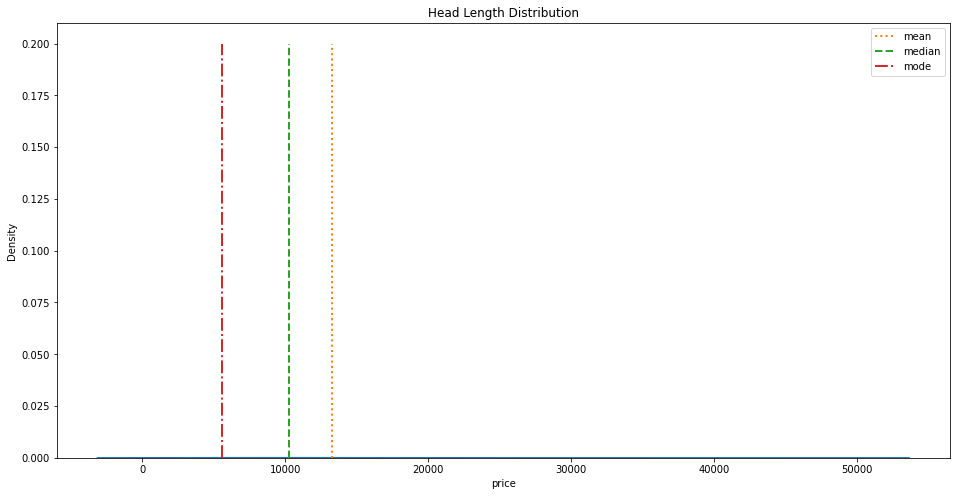

In [442]:
target_mean = round(df['price'].mean(), 2)
target_median = df['price'].median()
target_mode = df['price'].mode()[0]

plt.figure(figsize = (16, 8))

sns.distplot(df['price'], bins=50)

y = np.linspace(0, 0.2, 2)
plt.plot([target_mean]*2, y, label='mean', linestyle=':',  linewidth=2)
plt.plot([target_median]*2, y, label='median', linestyle='--',  linewidth=2)
plt.plot([target_mode]*2, y, label='mode', linestyle='-.', linewidth=2)

plt.title('Head Length Distribution')
plt.legend()

In [443]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8013ff23d0>,
      dtype=object)

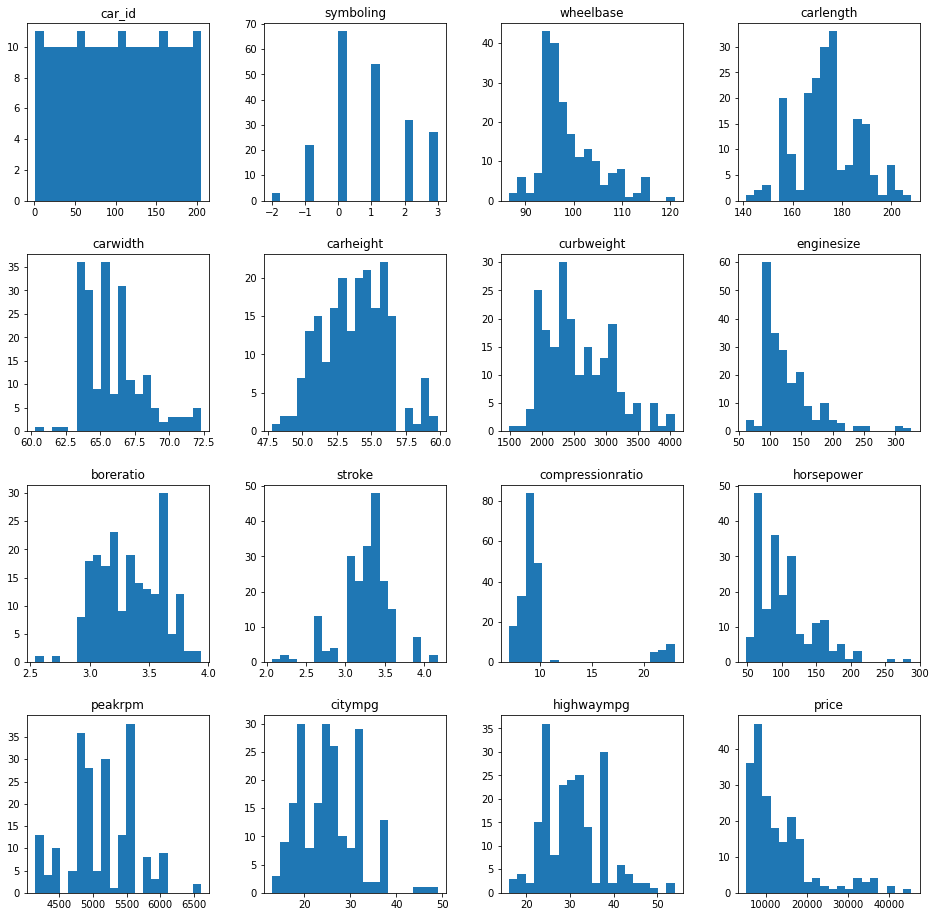

In [444]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False)

In [445]:
df.isnull().sum()

car_id              0
symboling           0
carname             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [446]:
df.isnull().sum()

car_id              0
symboling           0
carname             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

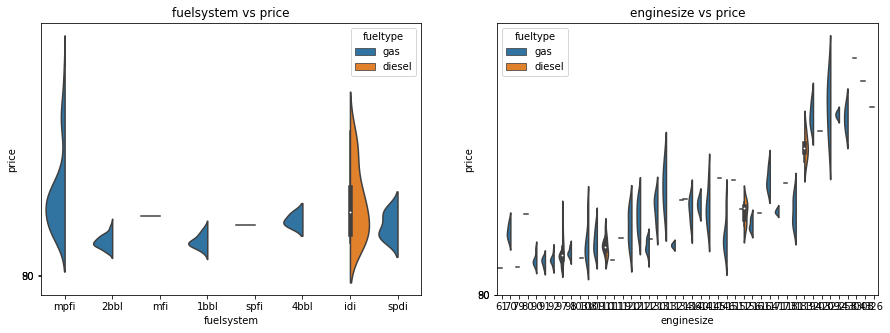

In [447]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot("fuelsystem", "price", hue="fueltype", data=df, split=True, ax=ax[0])
ax[0].set_title('fuelsystem vs price')
ax[0].set_yticks(range(80, 100, 10))
sns.violinplot("enginesize", "price", hue="fueltype", data=df, split=True, ax=ax[1])
ax[1].set_title('enginesize vs price')
ax[1].set_yticks(range(80, 100, 10))
plt.show()

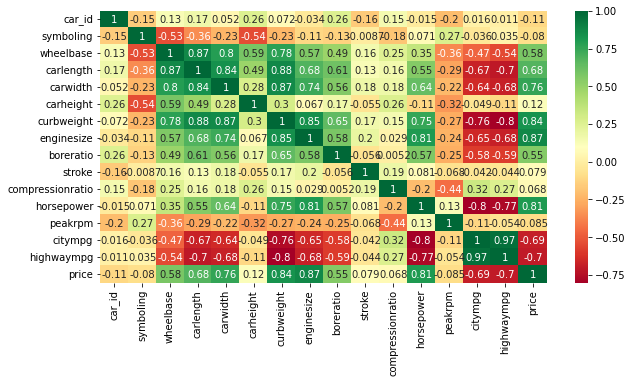

In [448]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [449]:
y = df["price"]
X = df.drop(columns=["price","carname","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"])

print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [450]:
scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

In [451]:
np.random.seed(1234)

In [452]:
table = pd.DataFrame(columns=['train_MSE', 'test_MSE', 'train_RMSE', 'test_RMSE', 'train_R2', 'test_R2'])

In [453]:
def mserror(X, w, y_pred):
    y = X.dot(w.T)
    return np.sum((y - y_pred)**2) / y_pred.shape[0]

def mserror_grad(X, w, y_pred):
  return 2*(X.dot(w.T)-y_pred).T.dot(X)/y_pred.shape[0]

def r2(X, w, y_pred):
    y = X.dot(w.T)
    return  r2_score(y, y_pred)

def gradient_descent(X, y):
  w = np.zeros(15)
  w_list = [w.copy()] # список векторов весов после каждой итерации
  errors = [] # список значений ошибок после каждой итерации
  eta = 0.000045 # шаг градиентного спуска
  max_iter = 1e4 # максимальное число итераций
  min_weight_dist = 1e-8 # критерий сходимости (разница весов, при которой алгоритм останавливается)
  weight_dist = np.inf # зададим начальную разницу весов большим числом
  iter_num = 0 # счетчик итераций
# ход градиентного спуска
  while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - eta * mserror_grad(X, w, y)
    weight_dist = np.linalg.norm(new_w - w)
    w_list.append(new_w.copy())
    cur_error = mserror(X, new_w, y)
    # print('current_error: {0}'.format(cur_error))
    # if(cur_error == 'inf'):
    #   continue
    errors.append(mserror(X, new_w, y))
    mse = round(errors[-1], 4)
    rmse = round(sqrt(mse),4)
    r_2 = round(r2(X, new_w, y),4)
    iter_num += 1
    w = new_w
    metrics_list = []
    metrics_list = [mse, rmse, r_2]
  w_list = np.array(w_list)
  print(f'MSE:{mse}') 
  print(f'RMSE: {rmse}')
  print(f'R_2: {r_2}')
  return mse, rmse, r_2, w_list[-1] 

def mserror_stohastic_grad(X, w, y_pred):
  i=np.random.randint(X.shape[0])
  x=X[i:i+1, :]
  return 2*(X.dot(w.T)-y_pred[i:i+1, :]).T.dot(x)

def stohastic_gradient_descent(X, y):
  st_w = np.zeros(15) # инициализируем начальный вектор весов
  st_w_list = [st_w.copy()] # список векторов весов после каждой итерации
  st_errors = [] # список значений ошибок после каждой итерации
  st_eta = 0.005 # шаг градиентного спуска
  st_max_iter = 1e4 # максимальное число итераций
  st_min_weight_dist = 1e-8 # критерий сходимости (разница весов, при которой алгоритм останавливается)
  st_weight_dist = np.inf # зададим начальную разницу весов большим числом
  st_iter_num = 0 # счетчик итераций 
  # ход стохастического градиентного спуска
  while st_weight_dist > st_min_weight_dist and st_iter_num < st_max_iter:
    st_new_w = st_w - st_eta * mserror_stohastic_grad(X, st_w, y)
    st_weight_dist = np.linalg.norm(st_new_w - st_w, ord=2)
    st_w_list.append(st_new_w.copy())
    cur_error = mserror(X, st_new_w, y)
    st_errors.append(cur_error)
    mse = round(st_errors[-1], 4)
    rmse = round(sqrt(mse),4)
    r_2 = round(r2(X, st_new_w, y),4)
    st_iter_num += 1
    st_w = st_new_w
  st_w_list = np.array(st_w_list)
  print(f'MSE:{mse}') 
  print(f'RMSE: {rmse}')
  print(f'R_2: {r_2}')
  return mse, rmse, r_2, st_w_list[-1] 

In [454]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [455]:
df = df.drop(columns=["carname","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"])
df = clean_dataset(df)

In [456]:
tr_mse, tr_rmse, tr_r2, w_tr = gradient_descent(X_train, y_train)

ValueError: ignored

In [ ]:

tr_mse, tr_rmse, tr_r2, w_tr = gradient_descent(X_test, y_test)

In [ ]:
df_2.loc['Gradient_descent'] = [tr_mse, t_mse, tr_rmse, t_rmse, tr_r2, t_r2]

In [ ]:
rfecv = RFECV(estimator=LinearRegression(), step=1, cv=5, scoring='neg_mean_squared_error')
rfecv = rfecv.fit(X_train, y_train)

selected_features = list(X_train.columns[rfecv.support_])

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features)

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv = RFECV(estimator=LinearRegression(), step=1, cv=5, scoring='r2')
rfecv = rfecv.fit(X_train, y_train)

selected_features = list(X_train.columns[rfecv.support_])

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features)

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
model = Ridge()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
df_2.loc['Ridge'] = [('%.4f' % mean_squared_error(y_train, y_train_pred)), ('%.4f' % mean_squared_error(y_test, y_test_pred)), ('%.4f' % sqrt(mean_squared_error(y_train, y_train_pred))), ('%.4f' % sqrt(mean_squared_error(y_test, y_test_pred))), ('%.4f' % r2_score(y_train, y_train_pred)), ('%.4f' % r2_score(y_test, y_test_pred))]

In [ ]:
model = Ridge()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

In [ ]:
df_2.loc['Ridge_scaled'] = [('%.4f' % mean_squared_error(y_train, y_train_pred)), ('%.4f' % mean_squared_error(y_test, y_test_pred)), ('%.4f' % sqrt(mean_squared_error(y_train, y_train_pred))), ('%.4f' % sqrt(mean_squared_error(y_test, y_test_pred))), ('%.4f' % r2_score(y_train, y_train_pred)), ('%.4f' % r2_score(y_test, y_test_pred))]

In [ ]:
alpha_grid = np.logspace(-2, 2, 10)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [ ]:
best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

In [ ]:
simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])
model = simple_pipeline.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
df_2.loc['Ridge_GridSearch_scale'] = [('%.4f' % mean_squared_error(y_train, y_train_pred)), ('%.4f' % mean_squared_error(y_test, y_test_pred)), ('%.4f' % sqrt(mean_squared_error(y_train, y_train_pred))), ('%.4f' % sqrt(mean_squared_error(y_test, y_test_pred))), ('%.4f' % r2_score(y_train, y_train_pred)), ('%.4f' % r2_score(y_test, y_test_pred))]

In [ ]:
simple_pipeline = Pipeline([
    ('regression', Ridge(best_alpha))
])
model = simple_pipeline.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
df_2.loc['Ridge_GridSearch_not_scale'] = [('%.4f' % mean_squared_error(y_train, y_train_pred)), ('%.4f' % mean_squared_error(y_test, y_test_pred)), ('%.4f' % sqrt(mean_squared_error(y_train, y_train_pred))), ('%.4f' % sqrt(mean_squared_error(y_test, y_test_pred))), ('%.4f' % r2_score(y_train, y_train_pred)), ('%.4f' % r2_score(y_test, y_test_pred))]

In [ ]:
df_1 = pd.DataFrame(columns=['Fold_1', 'Fold_2', 'Fold_3', 'Fold_4', 'Fold_5', 'E', 'STD'])
cv_scores_train_mse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores_train_mse = -cv_scores_train_mse
df_1.loc['mse-train'] = [cv_scores_train_mse[0], cv_scores_train_mse[1], cv_scores_train_mse[2], cv_scores_train_mse[3], cv_scores_train_mse[4], ('%.4f' % np.mean(cv_scores_train_mse)), ('%.4f' % np.std(cv_scores_train_mse))]
cv_scores_test_mse = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="neg_mean_squared_error")
cv_scores_test_mse = -cv_scores_test_mse
df_1.loc['mse-test'] = [cv_scores_test_mse[0], cv_scores_test_mse[1], cv_scores_test_mse[2], cv_scores_test_mse[3], cv_scores_test_mse[4], ('%.4f' % np.mean(cv_scores_test_mse)), ('%.4f' % np.std(cv_scores_test_mse))]
cv_scores_train_rmse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_root_mean_squared_error")
cv_scores_train_rmse = -cv_scores_train_rmse
df_1.loc['rmse-train'] = [cv_scores_train_rmse[0], cv_scores_train_rmse[1], cv_scores_train_rmse[2], cv_scores_train_rmse[3], cv_scores_train_rmse[4], ('%.4f' % np.mean(cv_scores_train_rmse)), ('%.4f' % np.std(cv_scores_train_rmse))]
cv_scores_test_rmse = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="neg_root_mean_squared_error")
cv_scores_test_rmse = -cv_scores_test_rmse
df_1.loc['rmse-test'] = [cv_scores_test_rmse[0], cv_scores_test_rmse[1], cv_scores_test_rmse[2], cv_scores_test_rmse[3], cv_scores_test_rmse[4], ('%.4f' % np.mean(cv_scores_test_rmse)), ('%.4f' % np.std(cv_scores_test_rmse))]
cv_scores_train_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="r2")
df_1.loc['r2-train'] = [cv_scores_train_r2[0], cv_scores_train_r2[1], cv_scores_train_r2[2], cv_scores_train_r2[3], cv_scores_train_r2[4], ('%.4f' % np.mean(cv_scores_train_r2)), ('%.4f' % np.std(cv_scores_train_r2))]
cv_scores_test_r2 = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="r2")
df_1.loc['r2-test'] = [cv_scores_test_r2[0], cv_scores_test_r2[1], cv_scores_test_r2[2], cv_scores_test_r2[3], cv_scores_test_r2[4], ('%.4f' % np.mean(cv_scores_test_r2)), ('%.4f' % np.std(cv_scores_test_r2))]
df_1

In [ ]:
df_2.loc['Ridge_cross_val'] = [('%.4f' % np.mean(cv_scores_train_mse)), ('%.4f' % np.mean(cv_scores_test_mse)), ('%.4f' % np.mean(cv_scores_train_rmse)), ('%.4f' % np.mean(cv_scores_test_rmse)), ('%.4f' % np.mean(cv_scores_train_r2)), ('%.4f' % np.mean(cv_scores_test_r2))]